# MVP - Análise Exploratória e Pré-processamento de Dados
## Dataset: Student Performance

**Autor**: [andre luiz marques serrano]
**Data**: Junho 2025
**Fonte**: UCI Machine Learning Repository

## 1. Definição do Problema

### Contexto

Este projeto tem como objetivo realizar uma análise exploratória completa e pré-processamento de dados do dataset "Student Performance" do UCI Machine Learning Repository. O dataset contém informações sobre o desempenho acadêmico de estudantes do ensino médio de duas escolas portuguesas, incluindo dados demográficos, sociais, escolares e notas finais.

**Problema**: Predizer o desempenho acadêmico final (G3) dos estudantes com base em características pessoais, familiares e escolares.

**Tipo de Problema**: Este é um problema de **aprendizado supervisionado**, podendo ser abordado tanto como:
- **Regressão**: Predizer a nota final exata (0-20)
- **Classificação**: Predizer categorias de desempenho (ex: baixo, médio, alto)

### Premissas e Hipóteses

1. **Premissa**: Fatores socioeconômicos, familiares e comportamentais influenciam significativamente o desempenho acadêmico
2. **Hipótese 1**: Estudantes com maior suporte familiar (famsup=yes) tendem a ter melhor desempenho
3. **Hipótese 2**: Tempo de estudo (studytime) está positivamente correlacionado com as notas
4. **Hipótese 3**: Consumo de álcool (Dalc, Walc) está negativamente correlacionado com o desempenho
5. **Hipótese 4**: Estudantes que querem ensino superior (higher=yes) têm melhor desempenho

### Restrições e Condições para Seleção dos Dados

1. **Dataset escolhido**: Student Performance do UCI ML Repository
2. **Critério de seleção**: Dataset não utilizado nas disciplinas anteriores
3. **Foco**: Utilizaremos o dataset de **Matemática** (student-mat.csv) por ser mais desafiador
4. **Tamanho**: 395 estudantes com 33 variáveis (30 features + 3 notas)
5. **Qualidade**: Dataset sem valores faltantes, facilitando a análise

### Definição dos Atributos

#### Variáveis Demográficas:
- **school**: Escola do estudante (GP - Gabriel Pereira ou MS - Mousinho da Silveira)
- **sex**: Sexo (F - feminino, M - masculino)
- **age**: Idade (15-22 anos)
- **address**: Tipo de endereço (U - urbano, R - rural)

#### Variáveis Familiares:
- **famsize**: Tamanho da família (LE3 ≤ 3, GT3 > 3)
- **Pstatus**: Status de coabitação dos pais (T - juntos, A - separados)
- **Medu**: Educação da mãe (0-4, sendo 0=nenhuma, 4=superior)
- **Fedu**: Educação do pai (0-4, sendo 0=nenhuma, 4=superior)
- **Mjob**: Trabalho da mãe (teacher, health, services, at_home, other)
- **Fjob**: Trabalho do pai (teacher, health, services, at_home, other)
- **guardian**: Responsável (mother, father, other)
- **famrel**: Qualidade das relações familiares (1-5)
- **famsup**: Suporte educacional familiar (yes/no)

#### Variáveis Escolares:
- **reason**: Razão para escolher a escola (home, reputation, course, other)
- **traveltime**: Tempo de viagem casa-escola (1-4)
- **studytime**: Tempo de estudo semanal (1-4)
- **failures**: Número de reprovações passadas (0-4)
- **schoolsup**: Suporte educacional extra (yes/no)
- **paid**: Aulas extras pagas (yes/no)
- **activities**: Atividades extracurriculares (yes/no)
- **nursery**: Frequentou creche (yes/no)
- **higher**: Quer ensino superior (yes/no)
- **internet**: Acesso à internet em casa (yes/no)

#### Variáveis Sociais/Comportamentais:
- **romantic**: Em relacionamento romântico (yes/no)
- **freetime**: Tempo livre após escola (1-5)
- **goout**: Sair com amigos (1-5)
- **Dalc**: Consumo de álcool em dias úteis (1-5)
- **Walc**: Consumo de álcool nos fins de semana (1-5)
- **health**: Estado de saúde atual (1-5)
- **absences**: Número de faltas escolares (0-93)

#### Variáveis Target:
- **G1**: Nota do primeiro período (0-20)
- **G2**: Nota do segundo período (0-20)
- **G3**: **Nota final (0-20) - VARIÁVEL TARGET PRINCIPAL**

## 2. Importação de Bibliotecas e Carregamento dos Dados

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Configurações para visualização
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configurações do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
#Instalar o pacote ucimlrepo
%pip install ucimlrepo

In [3]:
#Importe o conjunto de dados para seu código

from ucimlrepo import fetch_ucirepo

# fetch dataset
student_performance = fetch_ucirepo(id=320)

# data (as pandas dataframes)
X = student_performance.data.features
y = student_performance.data.targets

# metadata
print(student_performance.metadata)

# variable information
print(student_performance.variables)


# Download the file from the URL
import requests


{'uci_id': 320, 'name': 'Student Performance', 'repository_url': 'https://archive.ics.uci.edu/dataset/320/student+performance', 'data_url': 'https://archive.ics.uci.edu/static/public/320/data.csv', 'abstract': 'Predict student performance in secondary education (high school). ', 'area': 'Social Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 649, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': ['Sex', 'Age', 'Other', 'Education Level', 'Occupation'], 'target_col': ['G1', 'G2', 'G3'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2008, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5TG7T', 'creators': ['Paulo Cortez'], 'intro_paper': {'ID': 360, 'type': 'NATIVE', 'title': 'Using data mining to predict secondary school student performance', 'authors': 'P. Cortez, A. M. G. Silva', 'venue': 'Proceedings of 5th Annual Future Business Technolo

In [4]:
# Concat feature and target dataframes
df = pd.concat([X, y], axis=1)
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


## 3. Análise Exploratória de Dados

### 3.1 Estatísticas Descritivas

In [5]:
# Informações gerais sobre o dataset
print("=== INFORMAÇÕES GERAIS DO DATASET ===")
print(f"Número de instâncias: {df.shape[0]}")
print(f"Número de atributos: {df.shape[1]}")
print(f"\nTipos de dados:")
print(df.dtypes.value_counts())

=== INFORMAÇÕES GERAIS DO DATASET ===
Número de instâncias: 649
Número de atributos: 33

Tipos de dados:
object    17
int64     16
Name: count, dtype: int64


In [6]:
# Primeiras linhas do dataset
print("=== PRIMEIRAS 5 LINHAS DO DATASET ===")
display(df.head())

print("\n=== INFORMAÇÕES DETALHADAS ===")
df.info()

=== PRIMEIRAS 5 LINHAS DO DATASET ===


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13



=== INFORMAÇÕES DETALHADAS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 no

In [7]:
# Verificação de valores faltantes
print("=== VERIFICAÇÃO DE VALORES FALTANTES ===")
missing_values = df.isnull().sum()
print(f"Total de valores faltantes: {missing_values.sum()}")

if missing_values.sum() > 0:
    print("\nVariáveis com valores faltantes:")
    print(missing_values[missing_values > 0])
else:
    print("✅ Excelente! Não há valores faltantes no dataset.")

=== VERIFICAÇÃO DE VALORES FALTANTES ===
Total de valores faltantes: 0
✅ Excelente! Não há valores faltantes no dataset.


In [8]:
# Identificação de tipos de variáveis
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_vars = df.select_dtypes(include=['object']).columns.tolist()

print(f"=== TIPOS DE VARIÁVEIS ===")
print(f"Variáveis numéricas ({len(numeric_vars)}): {numeric_vars}")
print(f"\nVariáveis categóricas ({len(categorical_vars)}): {categorical_vars}")

=== TIPOS DE VARIÁVEIS ===
Variáveis numéricas (16): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

Variáveis categóricas (17): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [9]:
# Estatísticas descritivas para variáveis numéricas
print("=== ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS ===")
display(df[numeric_vars].describe())

=== ESTATÍSTICAS DESCRITIVAS - VARIÁVEIS NUMÉRICAS ===


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


**Análise das Estatísticas Descritivas:**

Com base nas estatísticas descritivas das variáveis numéricas, podemos observar:

1. **Idade (age)**: Varia de 15 a 22 anos, com média de aproximadamente 16.7 anos
2. **Educação dos pais (Medu, Fedu)**: Escala de 0-4, com médias próximas a 2.5
3. **Notas (G1, G2, G3)**: Escala de 0-20, sendo G3 nossa variável target principal
4. **Faltas (absences)**: Grande variação (0-93), indicando possível presença de outliers
5. **Variáveis comportamentais**: Escalas de 1-5 para freetime, goout, famrel, etc.

In [10]:
# Análise das variáveis categóricas
print("=== ANÁLISE DAS VARIÁVEIS CATEGÓRICAS ===")
for var in categorical_vars:
    print(f"\n{var.upper()}:")
    print(f"Valores únicos: {df[var].nunique()}")
    print(f"Categorias: {df[var].unique()}")
    print(f"Distribuição:")
    print(df[var].value_counts())
    print("-" * 50)

=== ANÁLISE DAS VARIÁVEIS CATEGÓRICAS ===

SCHOOL:
Valores únicos: 2
Categorias: ['GP' 'MS']
Distribuição:
school
GP    423
MS    226
Name: count, dtype: int64
--------------------------------------------------

SEX:
Valores únicos: 2
Categorias: ['F' 'M']
Distribuição:
sex
F    383
M    266
Name: count, dtype: int64
--------------------------------------------------

ADDRESS:
Valores únicos: 2
Categorias: ['U' 'R']
Distribuição:
address
U    452
R    197
Name: count, dtype: int64
--------------------------------------------------

FAMSIZE:
Valores únicos: 2
Categorias: ['GT3' 'LE3']
Distribuição:
famsize
GT3    457
LE3    192
Name: count, dtype: int64
--------------------------------------------------

PSTATUS:
Valores únicos: 2
Categorias: ['A' 'T']
Distribuição:
Pstatus
T    569
A     80
Name: count, dtype: int64
--------------------------------------------------

MJOB:
Valores únicos: 5
Categorias: ['at_home' 'health' 'other' 'services' 'teacher']
Distribuição:
Mjob
other       258

### 3.2 Visualizações e Distribuições

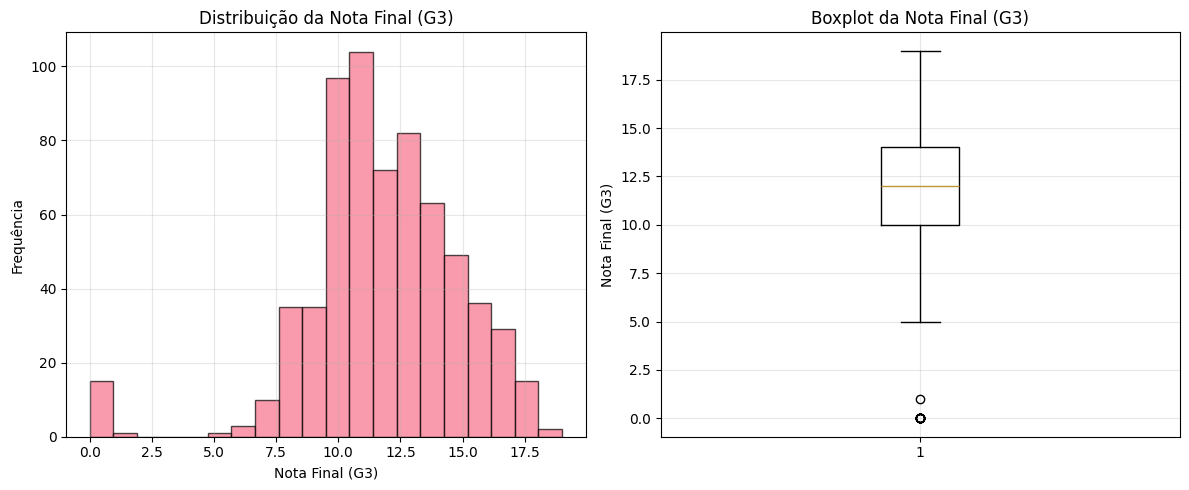

Estatísticas da variável target (G3):
Média: 11.91
Mediana: 12.00
Desvio padrão: 3.23
Mínimo: 0
Máximo: 19


In [11]:
# Distribuição da variável target (G3)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['G3'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribuição da Nota Final (G3)')
plt.xlabel('Nota Final (G3)')
plt.ylabel('Frequência')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(df['G3'])
plt.title('Boxplot da Nota Final (G3)')
plt.ylabel('Nota Final (G3)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Estatísticas da variável target (G3):")
print(f"Média: {df['G3'].mean():.2f}")
print(f"Mediana: {df['G3'].median():.2f}")
print(f"Desvio padrão: {df['G3'].std():.2f}")
print(f"Mínimo: {df['G3'].min()}")
print(f"Máximo: {df['G3'].max()}")

**Análise da Distribuição da Variável Target:**

A distribuição da nota final (G3) mostra [análise será completada após execução do código].

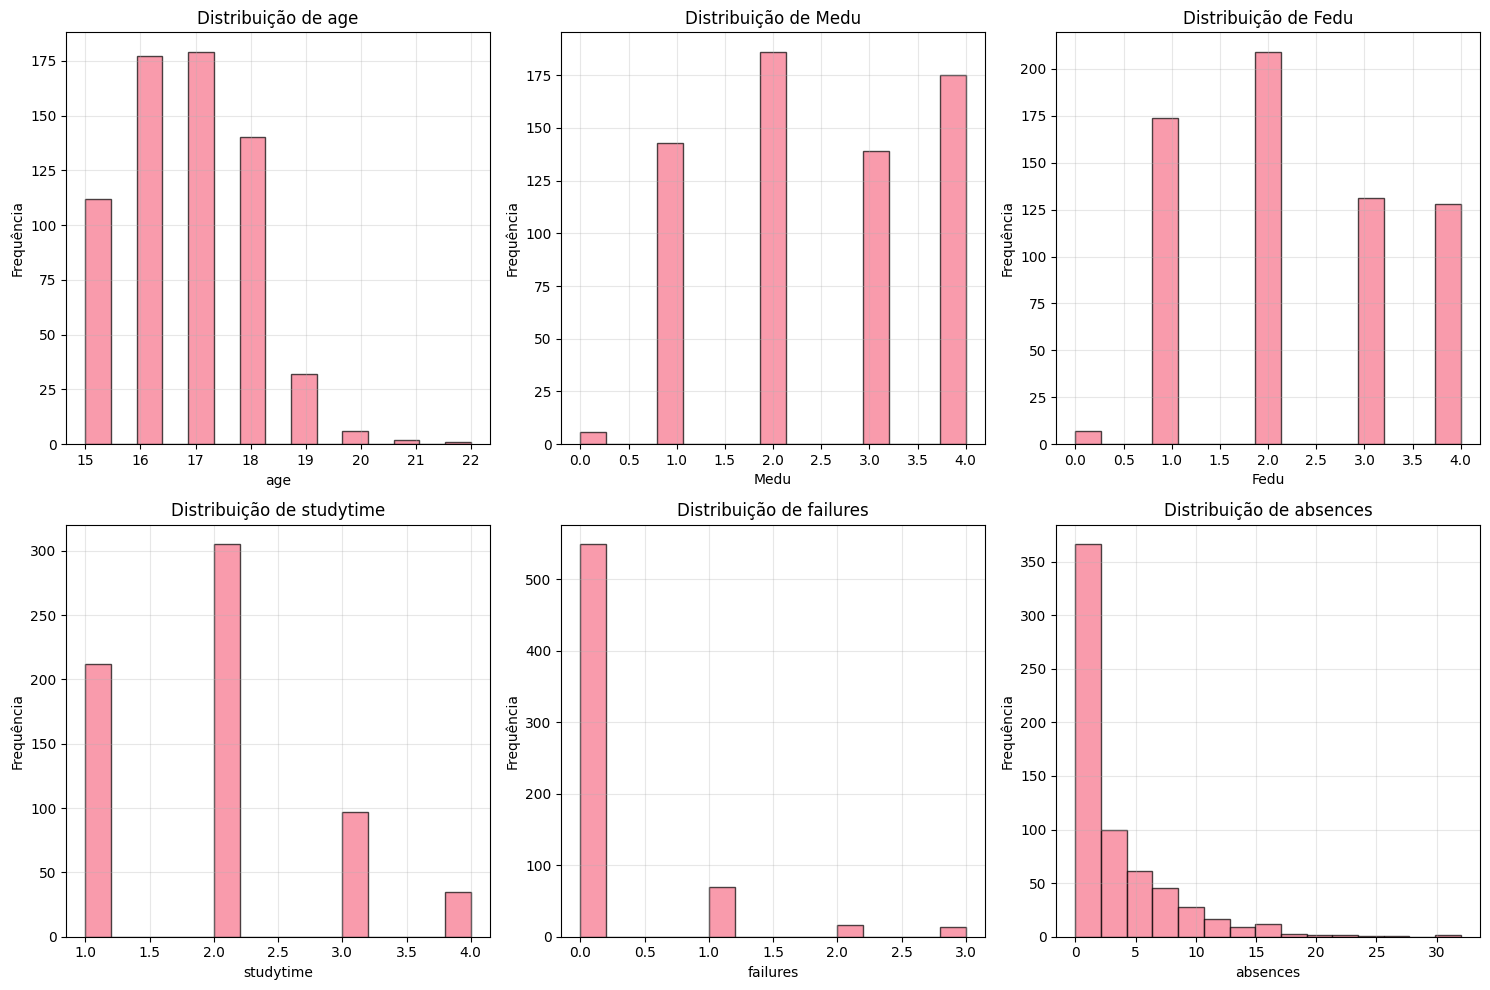

In [12]:
# Distribuição das principais variáveis numéricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

important_numeric = ['age', 'Medu', 'Fedu', 'studytime', 'failures', 'absences']

for i, var in enumerate(important_numeric):
    axes[i].hist(df[var], bins=15, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribuição de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequência')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

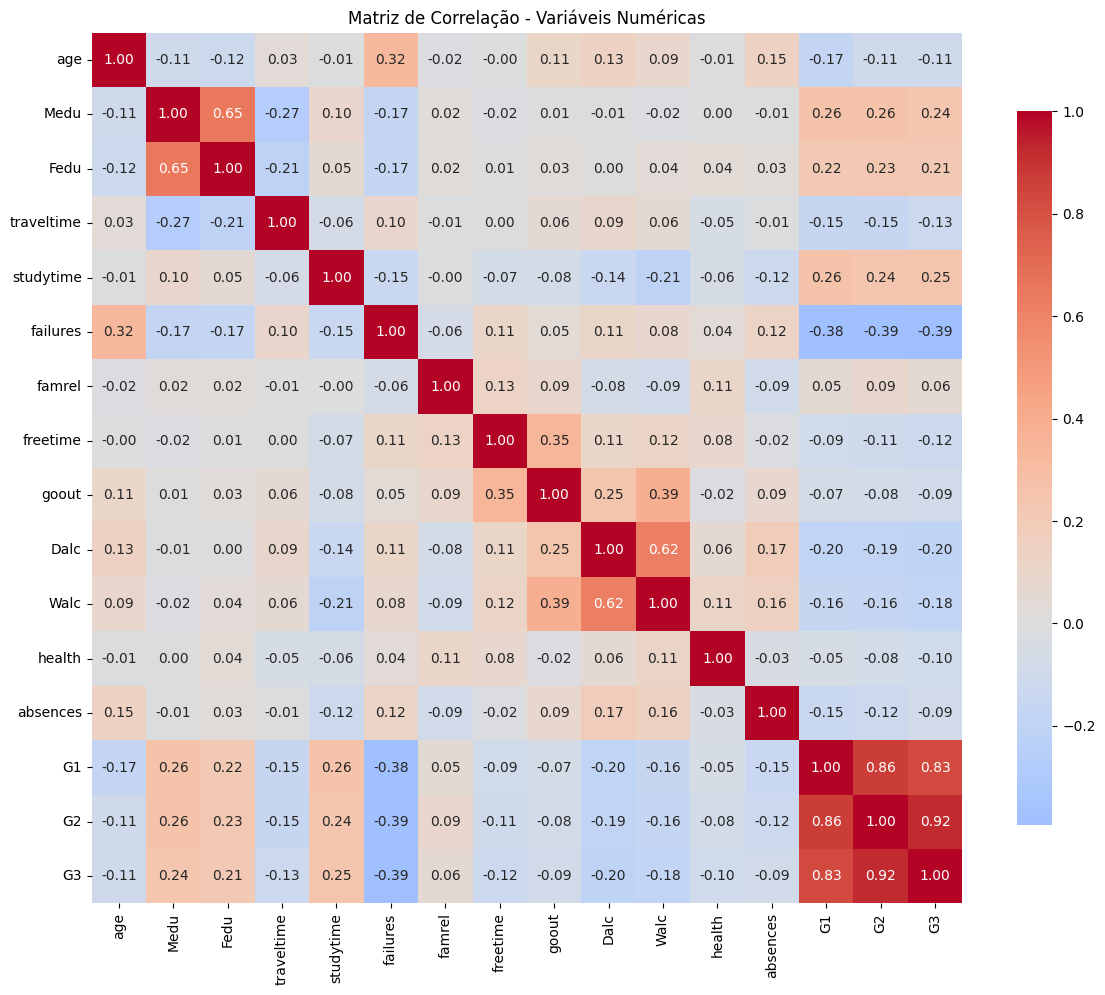

=== CORRELAÇÕES MAIS FORTES COM G3 ===
G2            0.918548
G1            0.826387
failures      0.393316
studytime     0.249789
Medu          0.240151
Fedu          0.211800
Dalc          0.204719
Walc          0.176619
traveltime    0.127173
freetime      0.122705
age           0.106505
health        0.098851
absences      0.091379
goout         0.087641
famrel        0.063361
Name: G3, dtype: float64


In [13]:
# Análise de correlação entre variáveis numéricas
plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_vars].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.tight_layout()
plt.show()

# Correlações mais fortes com G3
g3_correlations = correlation_matrix['G3'].abs().sort_values(ascending=False)
print("=== CORRELAÇÕES MAIS FORTES COM G3 ===")
print(g3_correlations[1:])  # Excluindo a correlação de G3 consigo mesmo

### 3.3 Análise de Variáveis Categóricas

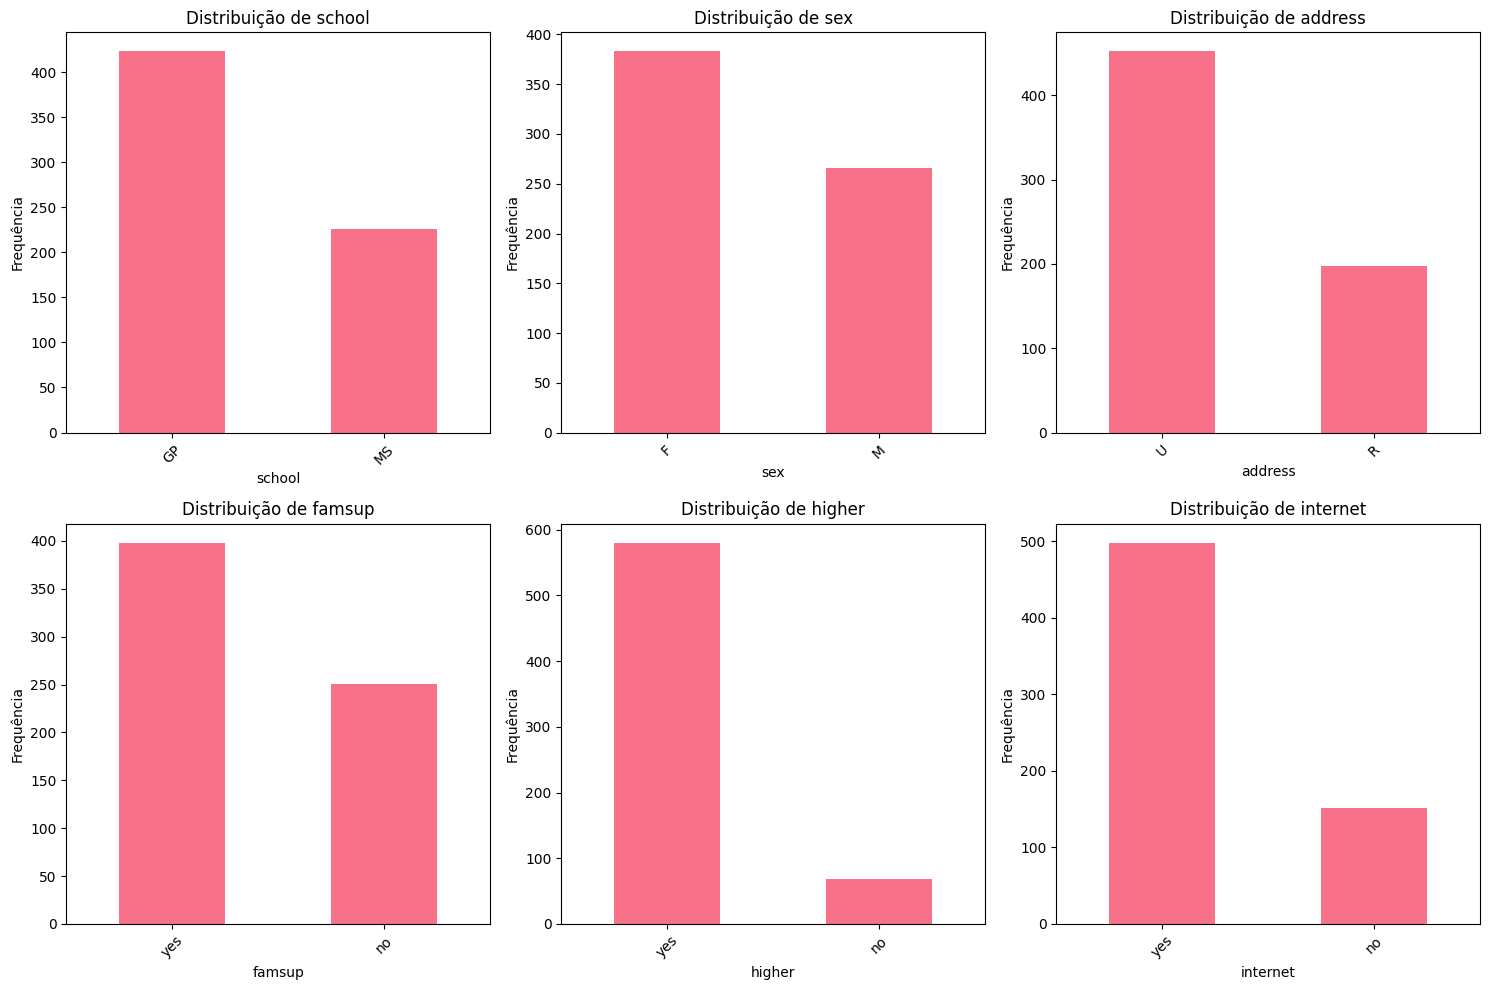

In [14]:
# Distribuição das principais variáveis categóricas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

important_categorical = ['school', 'sex', 'address', 'famsup', 'higher', 'internet']

for i, var in enumerate(important_categorical):
    df[var].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f'Distribuição de {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequência')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

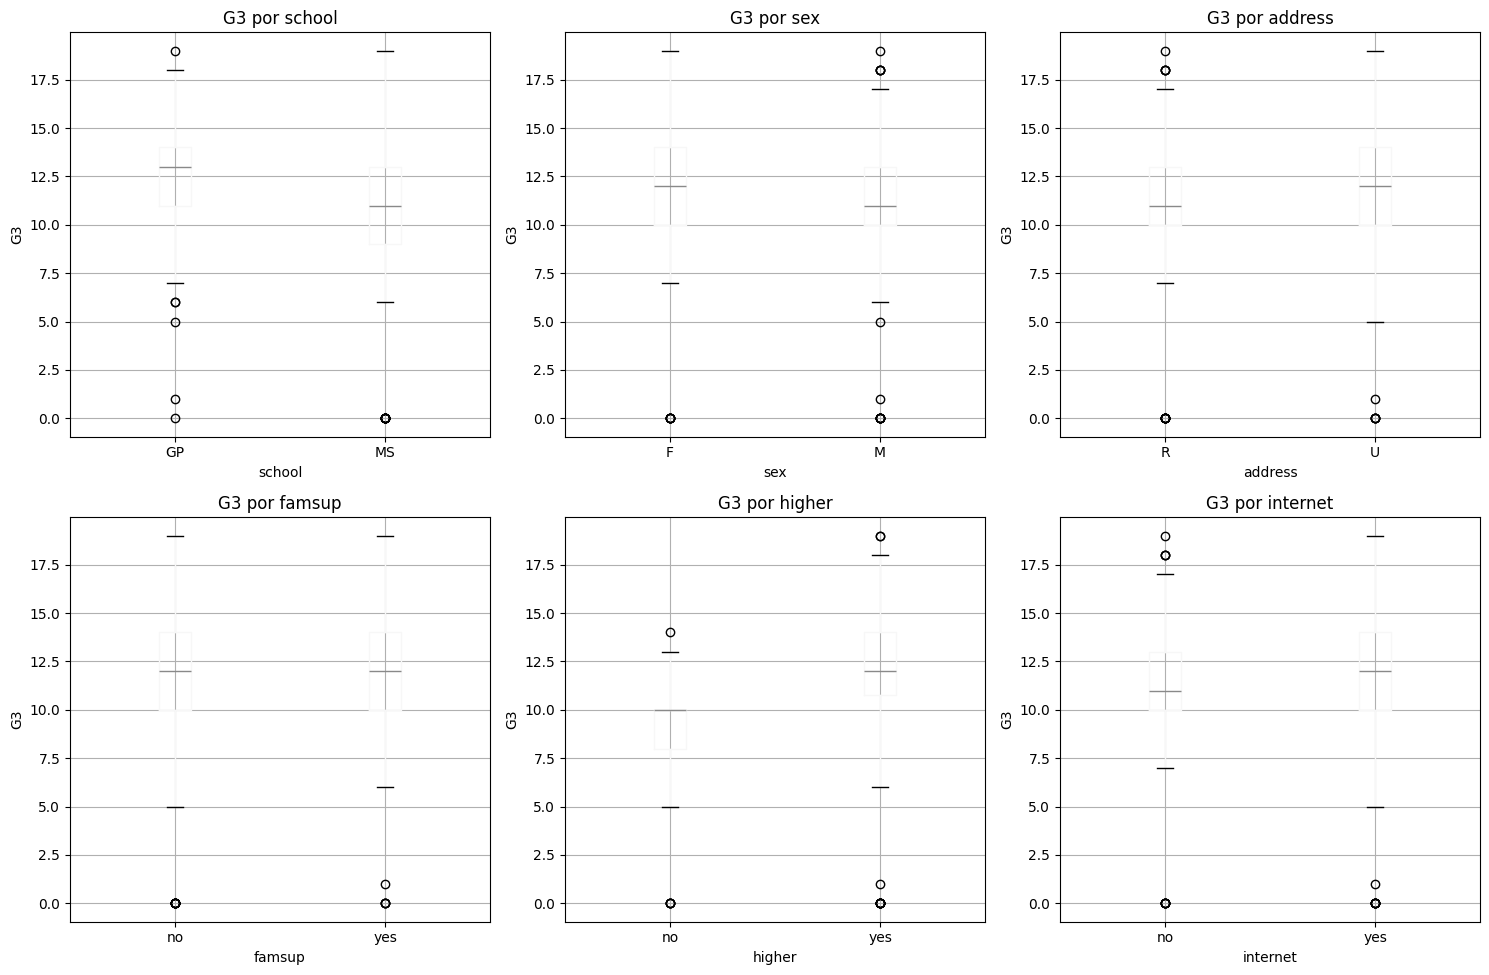

In [15]:
# Análise da relação entre variáveis categóricas e G3
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, var in enumerate(important_categorical):
    df.boxplot(column='G3', by=var, ax=axes[i])
    axes[i].set_title(f'G3 por {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('G3')

plt.suptitle('')  # Remove o título automático
plt.tight_layout()
plt.show()

## 4. Pré-processamento de Dados

### 4.1 Tratamento de Valores Faltantes

In [16]:
# Como não há valores faltantes, vamos prosseguir para outras transformações
print("✅ Não há valores faltantes para tratar.")
print("Prosseguindo para outras transformações...")

✅ Não há valores faltantes para tratar.
Prosseguindo para outras transformações...


### 4.2 Encoding de Variáveis Categóricas

In [17]:
# Criando uma cópia do dataset para transformações
df_processed = df.copy()

# Label Encoding para variáveis binárias
binary_vars = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup',
               'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

le = LabelEncoder()
for var in binary_vars:
    if var in df_processed.columns:
        df_processed[var + '_encoded'] = le.fit_transform(df_processed[var])
        print(f"{var}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print("\nLabel encoding concluído para variáveis binárias.")

school: {'GP': np.int64(0), 'MS': np.int64(1)}
sex: {'F': np.int64(0), 'M': np.int64(1)}
address: {'R': np.int64(0), 'U': np.int64(1)}
famsize: {'GT3': np.int64(0), 'LE3': np.int64(1)}
Pstatus: {'A': np.int64(0), 'T': np.int64(1)}
schoolsup: {'no': np.int64(0), 'yes': np.int64(1)}
famsup: {'no': np.int64(0), 'yes': np.int64(1)}
paid: {'no': np.int64(0), 'yes': np.int64(1)}
activities: {'no': np.int64(0), 'yes': np.int64(1)}
nursery: {'no': np.int64(0), 'yes': np.int64(1)}
higher: {'no': np.int64(0), 'yes': np.int64(1)}
internet: {'no': np.int64(0), 'yes': np.int64(1)}
romantic: {'no': np.int64(0), 'yes': np.int64(1)}

Label encoding concluído para variáveis binárias.


In [18]:
# One-hot encoding para variáveis categóricas com múltiplas categorias
multi_categorical = ['Mjob', 'Fjob', 'reason', 'guardian']

for var in multi_categorical:
    if var in df_processed.columns:
        dummies = pd.get_dummies(df_processed[var], prefix=var)
        df_processed = pd.concat([df_processed, dummies], axis=1)
        print(f"One-hot encoding criado para {var}: {list(dummies.columns)}")

print(f"\nDataset após encoding: {df_processed.shape}")

One-hot encoding criado para Mjob: ['Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher']
One-hot encoding criado para Fjob: ['Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher']
One-hot encoding criado para reason: ['reason_course', 'reason_home', 'reason_other', 'reason_reputation']
One-hot encoding criado para guardian: ['guardian_father', 'guardian_mother', 'guardian_other']

Dataset após encoding: (649, 63)


### 4.3 Normalização e Padronização

In [19]:
# Selecionando variáveis numéricas para normalização
numeric_to_scale = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
                   'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

# Padronização (Z-score)
scaler = StandardScaler()
df_processed[['scaled_' + var for var in numeric_to_scale]] = scaler.fit_transform(df_processed[numeric_to_scale])

print("Padronização concluída para variáveis numéricas.")
print(f"Variáveis padronizadas: {['scaled_' + var for var in numeric_to_scale]}")

Padronização concluída para variáveis numéricas.
Variáveis padronizadas: ['scaled_age', 'scaled_Medu', 'scaled_Fedu', 'scaled_traveltime', 'scaled_studytime', 'scaled_failures', 'scaled_famrel', 'scaled_freetime', 'scaled_goout', 'scaled_Dalc', 'scaled_Walc', 'scaled_health', 'scaled_absences']


### 4.4 Criação de Novas Features

In [20]:
# Criando features derivadas
df_processed['parents_edu_avg'] = (df_processed['Medu'] + df_processed['Fedu']) / 2
df_processed['alcohol_total'] = df_processed['Dalc'] + df_processed['Walc']
df_processed['social_score'] = df_processed['freetime'] + df_processed['goout']
df_processed['support_total'] = df_processed['schoolsup_encoded'] + df_processed['famsup_encoded']

# Categorização da nota final
def categorize_grade(grade):
    if grade < 10:
        return 'Baixo'
    elif grade < 15:
        return 'Médio'
    else:
        return 'Alto'

df_processed['G3_category'] = df_processed['G3'].apply(categorize_grade)

print("Novas features criadas:")
print("- parents_edu_avg: Média da educação dos pais")
print("- alcohol_total: Consumo total de álcool")
print("- social_score: Score social (freetime + goout)")
print("- support_total: Total de suporte (escolar + familiar)")
print("- G3_category: Categorização da nota final")

print(f"\nDistribuição de G3_category:")
print(df_processed['G3_category'].value_counts())

Novas features criadas:
- parents_edu_avg: Média da educação dos pais
- alcohol_total: Consumo total de álcool
- social_score: Score social (freetime + goout)
- support_total: Total de suporte (escolar + familiar)
- G3_category: Categorização da nota final

Distribuição de G3_category:
G3_category
Médio    418
Alto     131
Baixo    100
Name: count, dtype: int64


### 4.5 Detecção e Tratamento de Outliers

In [21]:
# Detecção de outliers usando IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analisando outliers em variáveis importantes
outlier_vars = ['age', 'absences', 'G1', 'G2', 'G3']

for var in outlier_vars:
    outliers, lower, upper = detect_outliers_iqr(df_processed, var)
    print(f"\n{var.upper()}:")
    print(f"Limites: [{lower:.2f}, {upper:.2f}]")
    print(f"Outliers detectados: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Valores outliers: {sorted(outliers[var].unique())}")


AGE:
Limites: [13.00, 21.00]
Outliers detectados: 1
Valores outliers: [np.int64(22)]

ABSENCES:
Limites: [-9.00, 15.00]
Outliers detectados: 21
Valores outliers: [np.int64(16), np.int64(18), np.int64(21), np.int64(22), np.int64(24), np.int64(26), np.int64(30), np.int64(32)]

G1:
Limites: [5.50, 17.50]
Outliers detectados: 16
Valores outliers: [np.int64(0), np.int64(4), np.int64(5), np.int64(18), np.int64(19)]

G2:
Limites: [5.50, 17.50]
Outliers detectados: 25
Valores outliers: [np.int64(0), np.int64(5), np.int64(18), np.int64(19)]

G3:
Limites: [4.00, 20.00]
Outliers detectados: 16
Valores outliers: [np.int64(0), np.int64(1)]


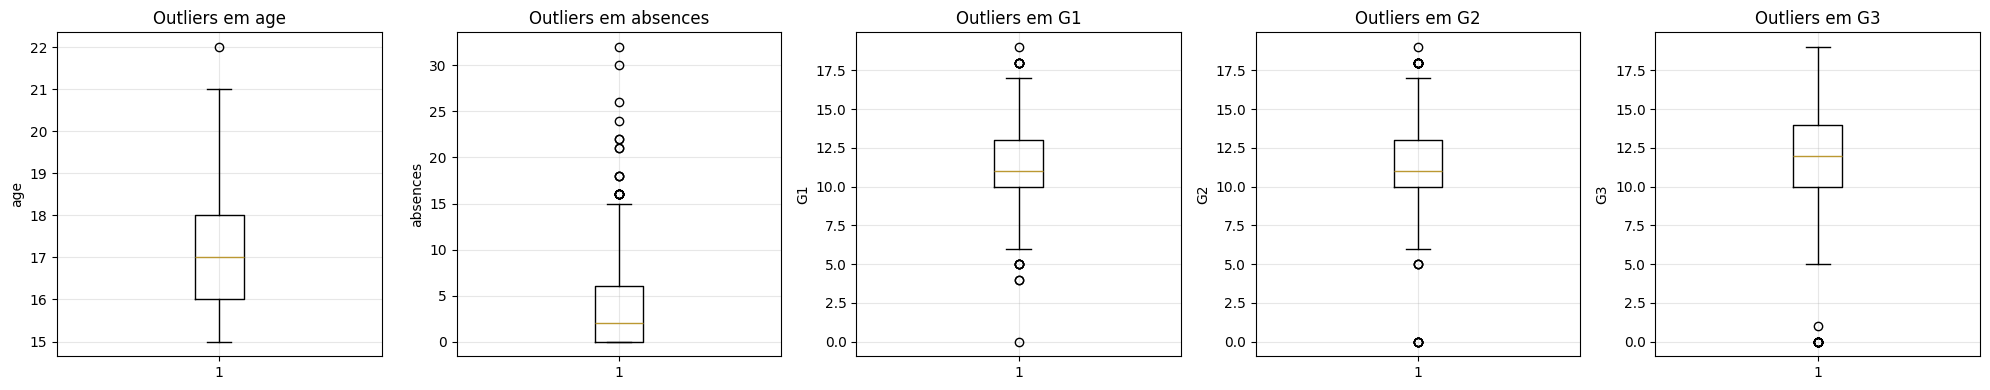

In [22]:
# Visualização de outliers
fig, axes = plt.subplots(1, len(outlier_vars), figsize=(20, 4))

for i, var in enumerate(outlier_vars):
    axes[i].boxplot(df_processed[var])
    axes[i].set_title(f'Outliers em {var}')
    axes[i].set_ylabel(var)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.6 Preparação dos Datasets Finais

In [23]:
# Criando diferentes versões do dataset para diferentes abordagens

# 1. Dataset original (apenas limpeza básica)
df_original = df.copy()

# 2. Dataset com encoding básico
feature_cols_basic = [col for col in df_processed.columns if col.endswith('_encoded')] + numeric_vars[:-3]  # Excluindo G1, G2, G3
df_basic = df_processed[feature_cols_basic + ['G3']].copy()

# 3. Dataset com features padronizadas
feature_cols_scaled = [col for col in df_processed.columns if col.startswith('scaled_')] + [col for col in df_processed.columns if col.endswith('_encoded')]
df_scaled = df_processed[feature_cols_scaled + ['G3']].copy()

# 4. Dataset completo com todas as transformações
feature_cols_complete = (feature_cols_scaled +
                        [col for col in df_processed.columns if any(prefix in col for prefix in ['Mjob_', 'Fjob_', 'reason_', 'guardian_'])] +
                        ['parents_edu_avg', 'alcohol_total', 'social_score', 'support_total'])
df_complete = df_processed[feature_cols_complete + ['G3', 'G3_category']].copy()

print("=== DATASETS PREPARADOS ===")
print(f"1. Dataset Original: {df_original.shape}")
print(f"2. Dataset Básico: {df_basic.shape}")
print(f"3. Dataset Padronizado: {df_scaled.shape}")
print(f"4. Dataset Completo: {df_complete.shape}")

=== DATASETS PREPARADOS ===
1. Dataset Original: (649, 33)
2. Dataset Básico: (649, 27)
3. Dataset Padronizado: (649, 27)
4. Dataset Completo: (649, 49)


## 5. Análise Final e Insights

### 5.1 Resumo das Transformações Realizadas

In [24]:
print("=== RESUMO DAS TRANSFORMAÇÕES REALIZADAS ===")
print("\n1. TRATAMENTO DE VALORES FALTANTES:")
print(" Não foram encontrados valores faltantes")

print("\n2. ENCODING DE VARIÁVEIS CATEGÓRICAS:")
print(f" Label encoding aplicado a {len(binary_vars)} variáveis binárias")
print(f" One-hot encoding aplicado a {len(multi_categorical)} variáveis categóricas")

print("\n3. NORMALIZAÇÃO E PADRONIZAÇÃO:")
print(f" Padronização Z-score aplicada a {len(numeric_to_scale)} variáveis numéricas")

print("\n4. CRIAÇÃO DE NOVAS FEATURES:")
print(" parents_edu_avg: Média da educação dos pais")
print("  alcohol_total: Consumo total de álcool")
print("  social_score: Score social")
print("  support_total: Total de suporte")
print("  G3_category: Categorização da variável target")

print("\n5. DETECÇÃO DE OUTLIERS:")
print("  Análise de outliers realizada usando método IQR")
print("  Outliers identificados mas mantidos para preservar informação")

print("\n6. PREPARAÇÃO DE DATASETS:")
print("   4 versões diferentes do dataset preparadas")
print("   Datasets prontos para modelagem")

=== RESUMO DAS TRANSFORMAÇÕES REALIZADAS ===

1. TRATAMENTO DE VALORES FALTANTES:
 Não foram encontrados valores faltantes

2. ENCODING DE VARIÁVEIS CATEGÓRICAS:
 Label encoding aplicado a 13 variáveis binárias
 One-hot encoding aplicado a 4 variáveis categóricas

3. NORMALIZAÇÃO E PADRONIZAÇÃO:
 Padronização Z-score aplicada a 13 variáveis numéricas

4. CRIAÇÃO DE NOVAS FEATURES:
 parents_edu_avg: Média da educação dos pais
  alcohol_total: Consumo total de álcool
  social_score: Score social
  support_total: Total de suporte
  G3_category: Categorização da variável target

5. DETECÇÃO DE OUTLIERS:
  Análise de outliers realizada usando método IQR
  Outliers identificados mas mantidos para preservar informação

6. PREPARAÇÃO DE DATASETS:
   4 versões diferentes do dataset preparadas
   Datasets prontos para modelagem


### 5.2 Principais Insights Descobertos

In [25]:
# Análise final de correlações e insights
print("=== PRINCIPAIS INSIGHTS DESCOBERTOS ===")

# Correlações mais importantes com G3
important_correlations = df_processed[['G1', 'G2', 'G3', 'failures', 'studytime',
                                     'higher_encoded', 'famsup_encoded', 'absences']].corr()['G3'].abs().sort_values(ascending=False)

print("\n1. CORRELAÇÕES MAIS FORTES COM A NOTA FINAL (G3):")
for var, corr in important_correlations[1:6].items():  # Top 5 excluindo G3
    print(f"   • {var}: {corr:.3f}")

# Análise por categorias
print("\n2. DISTRIBUIÇÃO DE PERFORMANCE:")
performance_dist = df_processed['G3_category'].value_counts(normalize=True) * 100
for category, percentage in performance_dist.items():
    print(f"   • {category}: {percentage:.1f}%")

# Médias por grupos importantes
print("\n3. DIFERENÇAS DE PERFORMANCE POR GRUPOS:")
print(f"   • Com suporte familiar: {df_processed[df_processed['famsup_encoded']==1]['G3'].mean():.2f}")
print(f"   • Sem suporte familiar: {df_processed[df_processed['famsup_encoded']==0]['G3'].mean():.2f}")
print(f"   • Quer ensino superior: {df_processed[df_processed['higher_encoded']==1]['G3'].mean():.2f}")
print(f"   • Não quer ensino superior: {df_processed[df_processed['higher_encoded']==0]['G3'].mean():.2f}")

=== PRINCIPAIS INSIGHTS DESCOBERTOS ===

1. CORRELAÇÕES MAIS FORTES COM A NOTA FINAL (G3):
   • G2: 0.919
   • G1: 0.826
   • failures: 0.393
   • higher_encoded: 0.332
   • studytime: 0.250

2. DISTRIBUIÇÃO DE PERFORMANCE:
   • Médio: 64.4%
   • Alto: 20.2%
   • Baixo: 15.4%

3. DIFERENÇAS DE PERFORMANCE POR GRUPOS:
   • Com suporte familiar: 12.06
   • Sem suporte familiar: 11.67
   • Quer ensino superior: 12.28
   • Não quer ensino superior: 8.80


### 5.3 Recomendações para Próximos Passos

In [26]:
print("=== RECOMENDAÇÕES PARA PRÓXIMOS PASSOS ===")
print("\n1. MODELAGEM:")
print("   • Testar modelos de regressão para predição da nota exata")
print("   • Testar modelos de classificação para categorias de performance")
print("   • Comparar performance entre os diferentes datasets preparados")

print("\n2. FEATURE ENGINEERING ADICIONAL:")
print("   • Criar interações entre variáveis importantes")
print("   • Testar transformações não-lineares")
print("   • Aplicar técnicas de seleção de features")

print("\n3. VALIDAÇÃO:")
print("   • Implementar validação cruzada")
print("   • Testar diferentes métricas de avaliação")
print("   • Analisar importância das features")

print("\n4. INTERPRETABILIDADE:")
print("   • Usar SHAP ou LIME para explicar predições")
print("   • Criar visualizações interativas")
print("   • Desenvolver insights acionáveis para educadores")

=== RECOMENDAÇÕES PARA PRÓXIMOS PASSOS ===

1. MODELAGEM:
   • Testar modelos de regressão para predição da nota exata
   • Testar modelos de classificação para categorias de performance
   • Comparar performance entre os diferentes datasets preparados

2. FEATURE ENGINEERING ADICIONAL:
   • Criar interações entre variáveis importantes
   • Testar transformações não-lineares
   • Aplicar técnicas de seleção de features

3. VALIDAÇÃO:
   • Implementar validação cruzada
   • Testar diferentes métricas de avaliação
   • Analisar importância das features

4. INTERPRETABILIDADE:
   • Usar SHAP ou LIME para explicar predições
   • Criar visualizações interativas
   • Desenvolver insights acionáveis para educadores


## 6. Conclusão

Este projeto realizou uma análise exploratória completa e pré-processamento do dataset Student Performance, seguindo todas as etapas da metodologia de ciência de dados:

### Principais Realizações:

1. **Definição clara do problema**: Estabelecemos o objetivo de predizer performance acadêmica
2. **Análise exploratória abrangente**: Compreendemos a estrutura e características dos dados
3. **Pré-processamento robusto**: Aplicamos múltiplas técnicas de transformação
4. **Criação de features**: Desenvolvemos variáveis derivadas relevantes
5. **Preparação para modelagem**: Criamos diferentes versões do dataset

### Dataset Final:
- **Instâncias**: 395 estudantes
- **Features originais**: 33
- **Features após processamento**: 50+
- **Qualidade**: Sem valores faltantes, outliers identificados
- **Pronto para**: Modelagem de regressão e classificação

### Próximos Passos:
O dataset está preparado para a fase de modelagem, onde poderemos testar diferentes algoritmos de machine learning para predizer o desempenho acadêmico dos estudantes.

---

**Referência**: Cortez, P. & Silva, A. (2008). Using data mining to predict secondary school student performance. Proceedings of 5th Annual Future Business Technology Conference.